### Studio 1
## Put your group number and the names of you and your groupmates here:
### Group: 9
- 1 -- Viktorya Hunanyan
- 2 -- Victor Nguyen
- 3 -- Hannah James




## Getting Comfortable with Python and NumPy

The goal of this studio is for you to get some practical experience manipulating basic python and NumPy data structures such as numbers, strings, and NumPy arrays.  In particular we're going to work on 

In [241]:
## run this cell first to import all the necessary tools
import numpy as np
import matplotlib.pyplot as plt

# Problem 1
## Masking in Python
### Part A)

Write a function `maskn(lst, i)` in the cell below which accepts a list of integers `lst` and a single integer *i*, and returns a list called mask, of the same length as `lst`, where the elements of mask are `0` for each number (in the original list) not divisible by `i`, and `1` for each number that is. The function should work for a list of any length.

This function should **only use built-in Python functions** (lists, `for` loops, functions, etc.).  No NumPy (yet).

In [245]:
def maskn(lst: list[int], i: int):
    '''
    Generates a mask which determines whether the elements of a list are divisible by an integer i.
    
    Note this should only be done with Python lists!
    
    PARAMETERS:
        lst - A Python list of integers.
        i   - An integer.
    
    RETURN VALUE:
        A Python list of integers which is either 0 or 1; a
        value of 1 indicates that the corresponding element of
        the list is divisible by i, 0 indicates otherwise.
    '''
    mask: list[int] = []
    
    for elem in lst: 
        if elem % i == 0:
            mask.append(0)
        else: 
            mask.append(1)
        
    # ??? Put your solution here ???
    return mask

### Part B)

Now do the same thing in the function `maskn_array(ary, i)`, but using NumPy arrays instead of Python lists. Your new function should return a NumPy array of Booleans that is False for each number in ary not divisible by `i`, and True for each number that is. See if you can write the code for the function in one line!

In [248]:
def maskn_array(ary: np.ndarray, i):
    '''
    Generates a mask which determines whether the elements of a NumPy array are divisible by an integer i.
    
    Note this should only be done with NumPy arrays!  See if you can write the function in one line!
    
    PARAMETERS:    
        ary - A NumPy array of integers.
        i   - An integer.
        
    RETURN VALUE:
        A NumPy array of booleans which are either True or False
    '''

    mask_numpy: np.ndarray = np.array(ary % i == 0)

    # ??? A solution is required here ???
    return mask_numpy

### Part C)

Which one do you expect to be faster? Try using the `%%timeit` command from class on both functions (pick a suitable test case, such as a list/NumPy array of integers from 0 to 10,000). Does the timing match your expectations?

#### Timing for maskn function:


In [252]:
%%timeit

my_list: list[int] = list(range(0, 10001))

my_int: int = 2
maskn(my_list, my_int)

# ??? A solution is required here ???


564 μs ± 1.87 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


#### Timing for maskn_array function:


In [254]:
%%timeit
my_numpy_array: np.ndarray = np.arange(0, 10000)
my_int: int = 2
maskn_array(my_numpy_array, my_int)

# ??? A solution is required here ???


32.5 μs ± 11.7 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


#### Text Response:

Timing for maskn function: 607 μs ± 14.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

Timing for maskn_array function: 32.6 μs ± 106 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

The timeing does match our expecatations becuase as we learned numpy is C under the hood. 

# Problem 2
## Plotting Piece-wise functions 

At the end of Lecture 3, I showed how you can create piece-wise functions in Python using *if/elif/else* statements.  A copy of the function is provided below:

In [259]:
def more_complicated_function(x):  
    '''
    The piece-wise function from Lecture 3

    PARAMETERS:
        x - a single input number
        
    RETURN VALUE:
        a single real number
    '''

    if x < 1:
        result =  np.exp(x)
    
    elif x > 2 and x < 4:
        result = -np.cos(x)
    
    elif x > 4 and x < 5:
        result = 1/x**2
    
    else: 
        result = 0
        
    return result

### Part A)

Using **only Python functions**, evaluate this function on a grid of 1000 points in the domain `[0,6]`.  Note that I did this in the iPython notebook for Lecture 3 (available on Canvas), so you can look that up if you need a hint.  Call the lists `xs_python` and `ys_python` (you don't need to do anything with them yet), but leave a `%%timeit` command in the cell to time how long it takes to generate them.

In [262]:
%%timeit

xs_python: list[float] = []  # instantiate an empty list, we will build this 
ys_python: list[float] = []  # instantiate an empty list, we will build this


# Define the number of points
num_points = 1000

# Define the start and end of the interval
start = 0.0
end = 6.0

# Calculate the spacing between points
step = (end - start) / (num_points - 1)

# Generate the list of points
for i in range(0, num_points): 
    xs_python.append(start + i * step)  # multiply each num 0 - 1000 (not including 1000) by step to get the x values (similar to x*dx) and add it to our list of x's

for x in xs_python: # iterate through each elem of the the list 
    ys_python.append(more_complicated_function(x)) # give a y value for each x in our array and append that to the our empty y list
    
    # each y-value at an index couples corresponds the the y-value recieved when evaluating it in the x at the same index

496 μs ± 332 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Part B)

Now we're going to do the same thing, but with **NumPy arrays**.  The tricky part here is that you can do the if statements entirely with boolean operators (`<`,`>=`,`==`, etc.), but they have to be between **NumPy arrays**.

In [265]:
def more_complicated_function_numpy(input_array):   
    '''
    Implements the "more_complicated_function" from above, but using NumPy arrays
    
    Note this should only be done with NumPy arrays!  Each if/elif/else statement should be rewritten
    as a operation between NumPy arrays.
    
    PARAMETERS:
        input_array - A NumPy array (the xs).
        
    RETURN VALUE:
        A NumPy array of real numbers (the ys)
    '''
    
    ## First I use a built-in numpy function (zeros_like), that creates an array the same 
    ##shape as input_array, but where every element is zero
    output_array = np.zeros_like(input_array)
    
    ## For the first "if" statement, I *mask* every element in input_array larger than one
    mask_1 = (input_array < 1)

    ## Then, I only calculate the exponential function for the elements in my input_array, but
    ## ONLY for the elements where mask_1 is true (i.e. where the corresponding element in 
    ## input_array is less than one).  Note I need to do this for both the input_array and output_array
    output_array[mask_1] = np.exp(input_array[mask_1])
    
    ## Now do the same thing for the next conditional statements below
    mask_2 = (input_array > 2) & (input_array < 4)
    output_array[mask_2] = -np.cos(input_array[mask_2])

    mask_3 = (input_array > 4) & (input_array < 5)
    output_array[mask_3] = 1/((input_array[mask_3])**2)
    
    return output_array

Once you've created your function, run the cell below and compare how long it takes to generate the same data as you did in **Part A**

In [267]:
%%timeit

xs_numpy = np.linspace(0,6,1000)
ys_numpy = more_complicated_function_numpy(xs_numpy)


30.9 μs ± 127 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Part C)
As a final check, let's plot the results!  Using the code below, create a plot with two lines on it, one made from (`xs_python`,`ys_python`), and one made from (`xs_numpy`,`ys_numpy`).  They should lie on top of one another, so think about how you can modify the code to show both lines simultainously.

Hint: Try reading through the help documentation for the `plt.plot` function below (that you get from hitting Shift-Tab), and see if you can change the style or the size of one of the lines. 

Text(0, 0.5, 'f(x)')

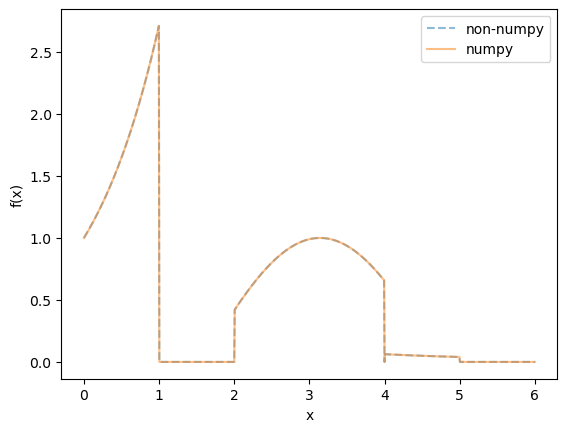

In [269]:
xs_numpy = np.linspace(0,6,1000)
ys_numpy = more_complicated_function_numpy(xs_numpy)

xs_python: list[float] = []  # instantiate an empty list, we will build this 
ys_python: list[float] = []  # instantiate an empty list, we will build this


# Define the number of points
num_points = 1000

# Define the start and end of the interval
start = 0.0
end = 6.0

# Calculate the spacing between points
step = (end - start) / (num_points - 1)

# Generate the list of points
for i in range(0, num_points): 
    xs_python.append(start + i * step)  # multiply each num 0 - 1000 (not including 1000) by step to get the x values (similar to x*dx) and add it to our list of x's

for x in xs_python: # iterate through each elem of the the list 
    ys_python.append(more_complicated_function(x)) # give a y value for each x in our array and append that to the our empty y list
    
    # each y-value at an index couples corresponds the the y-value recieved when evaluating it in the x at the same index

plt.plot(xs_python, ys_python, label='non-numpy', alpha=0.5, linestyle='dashed')
plt.plot(xs_numpy, ys_numpy, label='numpy', alpha=0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')